In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [6]:
df=pd.read_csv("diabetes.csv")

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.shape

(768, 9)

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

In [10]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot: >

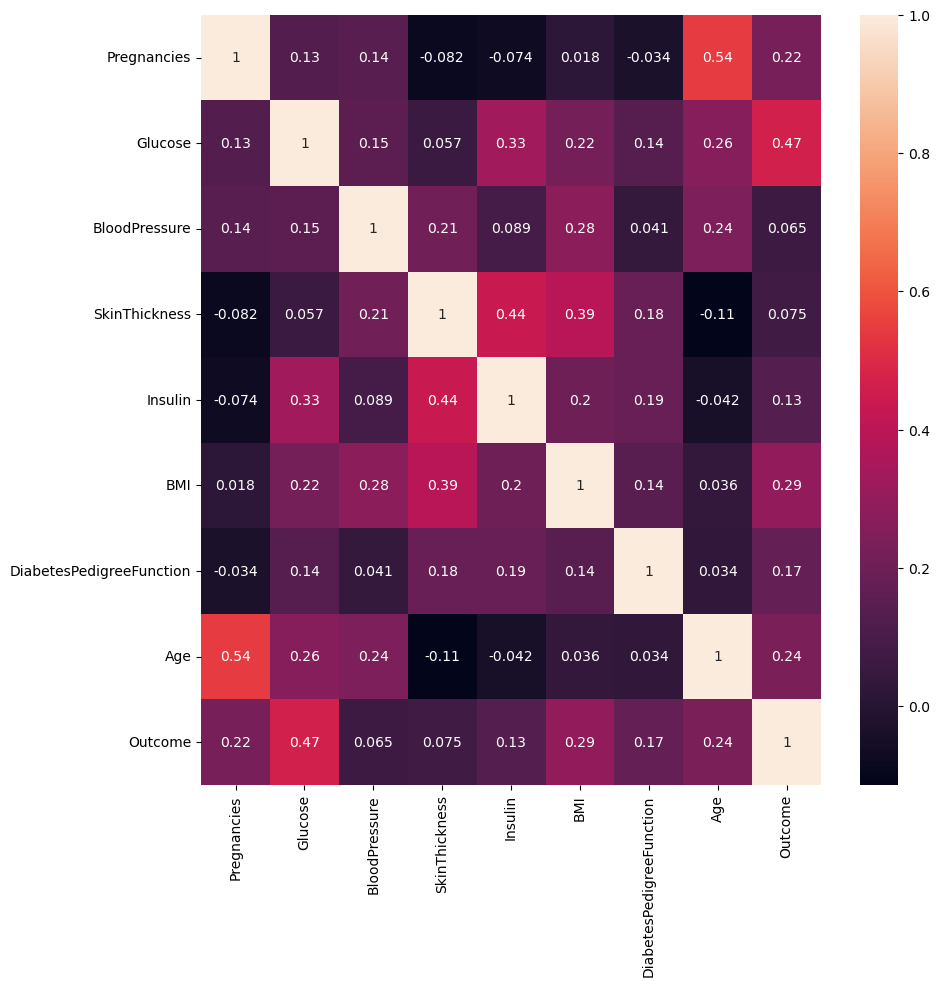

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(),annot=True)    

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
X=df.iloc[:,:-1]
y=df["Outcome"]

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.33)

Q4. Use a decision tree algorithm, such as ID3 or C=4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [17]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

In [18]:
regressor=DecisionTreeRegressor()

In [19]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [20]:
y_pred=regressor.predict(X_test)

In [21]:
parameters={
    'criterion':["squared_error","friedman_mse", "absolute_error","poisson"],
    'splitter':["best","random"],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12],
    'max_features':["auto", "sqrt","log2"]   
}

In [22]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(regressor,param_grid=parameters,cv=5)

In [23]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [24]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 4,
 'max_features': 'auto',
 'splitter': 'best'}

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [25]:
regressor=DecisionTreeRegressor(criterion="poisson",max_depth=4,max_features="auto",splitter="best")

In [26]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=4, max_features='auto')

In [27]:
y_pred=regressor.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [29]:
print(accuracy_score(y_test,y_pred.round()))
print(confusion_matrix(y_test,y_pred.round()))
print(classification_report(y_test,y_pred.round()))

0.7047244094488189
[[115  53]
 [ 22  64]]
              precision    recall  f1-score   support

           0       0.84      0.68      0.75       168
           1       0.55      0.74      0.63        86

    accuracy                           0.70       254
   macro avg       0.69      0.71      0.69       254
weighted avg       0.74      0.70      0.71       254



Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

[Text(0.3958333333333333, 0.9, 'x[1] <= 123.5\npoisson = 0.368\nsamples = 514\nvalue = 0.354'),
 Text(0.125, 0.7, 'x[5] <= 26.45\npoisson = 0.305\nsamples = 297\nvalue = 0.175'),
 Text(0.08333333333333333, 0.5, 'poisson = 0.05\nsamples = 89\nvalue = 0.011'),
 Text(0.16666666666666666, 0.5, 'x[7] <= 28.5\npoisson = 0.345\nsamples = 208\nvalue = 0.245'),
 Text(0.08333333333333333, 0.3, 'x[5] <= 33.25\npoisson = 0.218\nsamples = 110\nvalue = 0.091'),
 Text(0.041666666666666664, 0.1, 'poisson = 0.075\nsamples = 53\nvalue = 0.019'),
 Text(0.125, 0.1, 'poisson = 0.291\nsamples = 57\nvalue = 0.158'),
 Text(0.25, 0.3, 'x[1] <= 99.5\npoisson = 0.365\nsamples = 98\nvalue = 0.418'),
 Text(0.20833333333333334, 0.1, 'poisson = 0.302\nsamples = 35\nvalue = 0.171'),
 Text(0.2916666666666667, 0.1, 'poisson = 0.327\nsamples = 63\nvalue = 0.556'),
 Text(0.6666666666666666, 0.7, 'x[1] <= 154.5\npoisson = 0.307\nsamples = 217\nvalue = 0.599'),
 Text(0.5, 0.5, 'x[5] <= 27.35\npoisson = 0.362\nsamples = 135

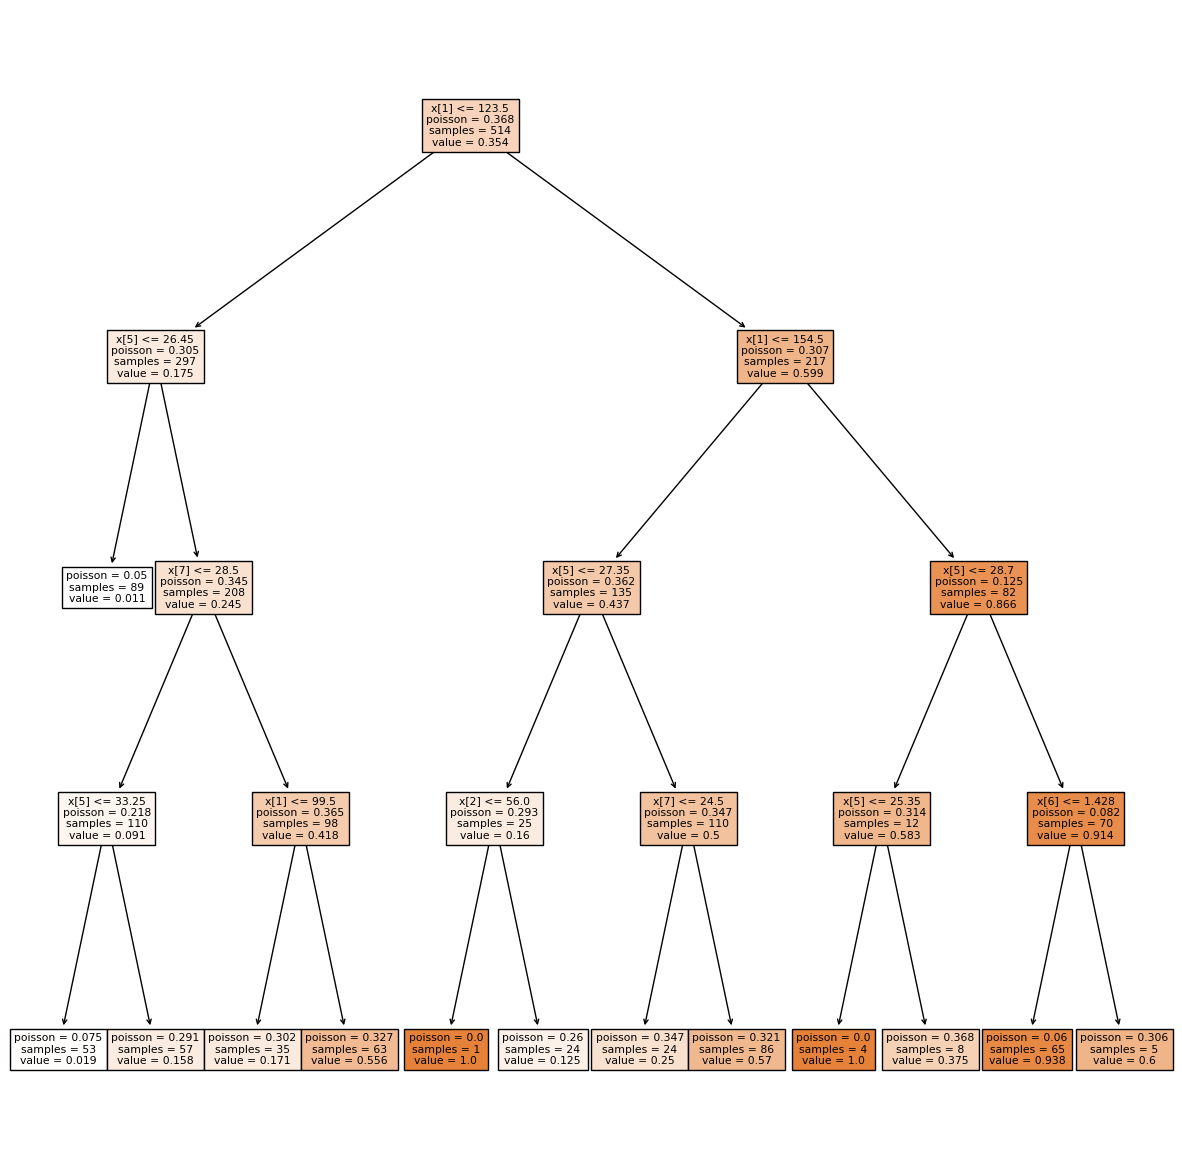

In [30]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(regressor,filled=True)

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

In [31]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
predict=regressor.predict([[3,9,40,20,50,25.5,0.66,23]])

In [60]:
predict[0]

0.011235955056179775

In [61]:
predict=regressor.predict([[6,148,72,35,0,33.6,0.627,50]])

In [62]:
predict[0]

0.5697674418604651

In [63]:
predict=regressor.predict([[8,183,64,0,0,23.3,0.672,32]])

In [64]:
predict[0]

1.0

From above testing we conclude that the model is working properly.